In [1]:
import pandas as pd  ## read,process data
import numpy as np   ## numerical operations
import seaborn as sns  ## visualisation
import matplotlib.pyplot as plt ## visualisation
data_df=pd.read_csv("heart.csv") ##load data


In [2]:
data_df.isnull().sum()


age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [3]:
data_df.head(10)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  target    920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [5]:
#2. distribution of target variable.
data_df['target'] = np.where(data_df['target']!= 0, 1, 0) ## ['target']!= 0,1, 0 - means here not equal to 0 keep as 1 else keep as 0
data_df.head()
data_df['target'] = data_df['target'].astype('category')   ## convert it into categorical  variable
                                                           ## here 4 classification was there,it is needed to be converted to two classes (0,1,2,3)to(0,1)



In [6]:
data_df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       920 non-null    int64   
 1   sex       920 non-null    object  
 2   dataset   920 non-null    object  
 3   cp        920 non-null    object  
 4   trestbps  861 non-null    float64 
 5   chol      890 non-null    float64 
 6   fbs       830 non-null    object  
 7   restecg   918 non-null    object  
 8   thalch    865 non-null    float64 
 9   exang     865 non-null    object  
 10  oldpeak   858 non-null    float64 
 11  slope     611 non-null    object  
 12  ca        309 non-null    float64 
 13  thal      434 non-null    object  
 14  target    920 non-null    category
dtypes: category(1), float64(5), int64(1), object(8)
memory usage: 101.8+ KB


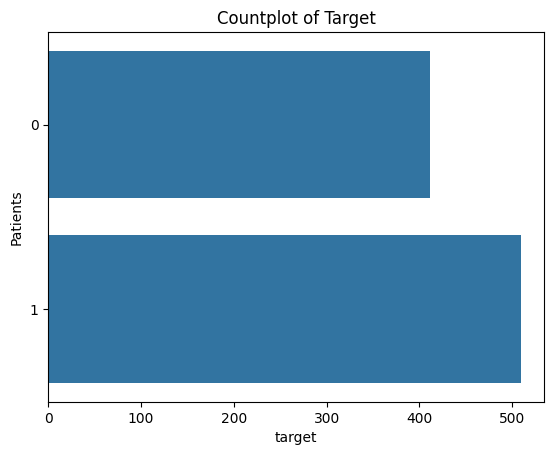

In [8]:
sns.countplot(data_df['target'])
# Add labels
plt.title('Countplot of Target')
plt.xlabel('target')
plt.ylabel('Patients')
plt.show()

Let us proceed by splitting our training and test data and our input and target variables. Since we are using KNN, it is mandatory to scale our datasets too.

In [9]:
# Create a list of categorical columns and numerical columns
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal','dataset'] 

num_cols = ['age','trestbps','chol','thalch','oldpeak'] ## only numerical columns


In [10]:
df_continuous = data_df[num_cols]  ## created new dataframe that contains only numerical columns
df_continuous.fillna(0, inplace=True) ## fill null values with 0(not applicable in all cases)

/home/u213910/tmp/ipykernel_2405047/2788528492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuous.fillna(0, inplace=True) ## fill null values with 0(not applicable in all cases)


In [11]:
# creating a Knn model
y = data_df["target"].values  ##i.e 0,1
x = df_continuous  ## contains only numerical columns

#Scaling - mandatory for knn  ##is used to make numerical values in date set to a fixed range
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV ## for fimdimg the best kmeans clustering
ss = StandardScaler()
x = ss.fit_transform(x)

#SPlitting into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 70% training and 30% test


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [12]:
## The intuition behind choosing the best value of k is beyond the scope of this article, but we should know that we can determine the optimum value of k when we get the highest test score for that value. For that, we can evaluate the training and testing scores for up to 20 nearest neighbors:

In [13]:
from sklearn.neighbors import KNeighborsClassifier  # KNeighborsClassifier as we have target value
train_score = []
test_score = []
k_vals = [] ## best k vslues

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)

    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

To evaluate the max test score and the k values associated with it, run the following command:

#### This code finds the maximum test score in a list called `test_score`, identifies the index or indices of the maximum score, and then prints the maximum test score along with the corresponding value(s) of 'k' (incremented by 1, as indexing typically starts from 0 in programming) from the list of indices.

In [14]:
## score that comes from the testing set only
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 75.0 and k = [15]


Thus, we have obtained the optimum value of k to be 3, 11, or 20 with a score of 83.5. We will finalize one of these values and fit the model accordingly:

In [15]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7065217391304348

Now, how do we evaluate whether this model is a ‘good’ model or not? For that, we use something called a Confusion Matrix:

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve  ## using best k -created a model
y_pred = knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)  

Predicted,0,1,All
Actual,,,
0,86,51,137
1,30,109,139
All,116,160,276


In [17]:
cm

array([[ 86,  51],
       [ 30, 109]])

In [18]:
acc=np.sum(np.diag(cm))/np.sum(cm)
prec=cm[0,0]/(cm[0,0]+cm[1,0])
recal=cm[0,0]/(cm[0,0]+cm[0,1])
fscore=2*(prec*recal)/(prec+recal)


In [19]:
print("Accuracy:", acc)
print("Precision: ",prec)
print("Recall: ",recal)
print("f1-score: ",fscore)

Accuracy: 0.7065217391304348
Precision:  0.7413793103448276
Recall:  0.6277372262773723
f1-score:  0.6798418972332015


All these measures in single function:

In [20]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.63      0.68       137
           1       0.68      0.78      0.73       139

    accuracy                           0.71       276
   macro avg       0.71      0.71      0.70       276
weighted avg       0.71      0.71      0.70       276



In [21]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [22]:
# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC: %.3f' % auc)  ## adipoli model need value above 0.8

AUC: 0.756


In [23]:
from sklearn.metrics import RocCurveDisplay

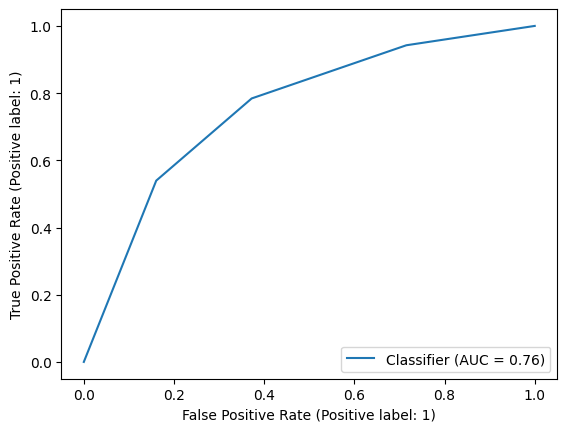

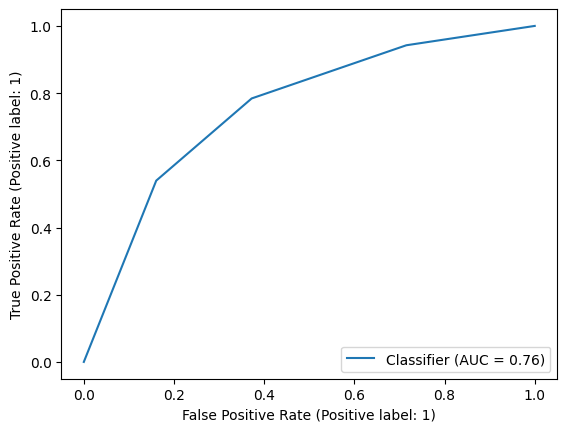

In [24]:
# Create a RocCurveDisplay object
roc_curve_display = RocCurveDisplay.from_predictions(y_test, y_pred_proba)

# Plot the ROC curve
roc_curve_display.plot()

## MODEL 2 Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [26]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
model2 = LogisticRegression()

In [28]:
# Train the model
model2.fit(x_train, y_train)

LogisticRegression()

In [29]:
y_pred = model2.predict(x_test)

In [30]:
# Evaluate the performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.7137681159420289
Precision: 0.7549668874172185
Recall: 0.7307692307692307


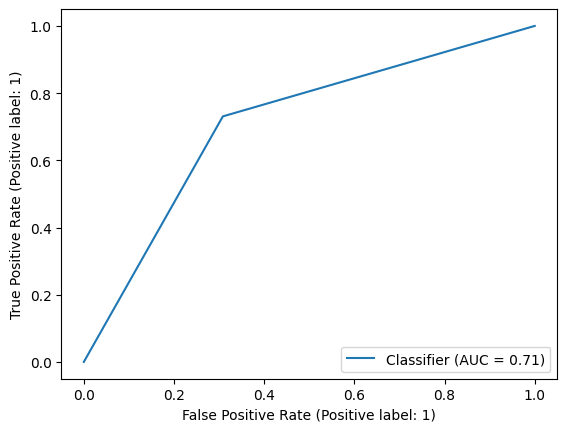

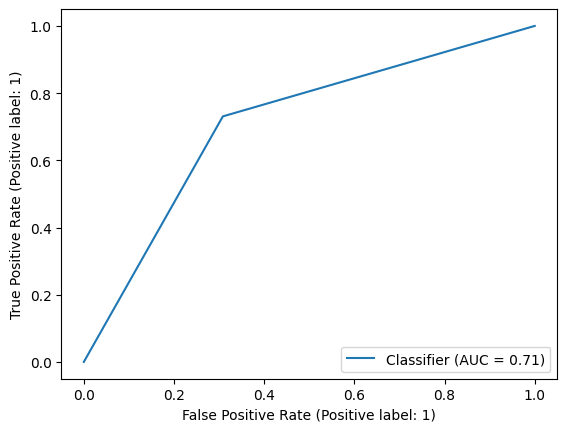

In [31]:
# Create a RocCurveDisplay object
roc_curve_display = RocCurveDisplay.from_predictions(y_test, y_pred)

# Plot the ROC curve
roc_curve_display.plot()

In [32]:
## MODEL 3 Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import category_encoders as ce
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [34]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
import pickle

In [36]:
# Create a Decision Tree Classifier with the "entropy" criterion
clf = DecisionTreeClassifier(criterion="entropy")

In [37]:
# Train the classifier on the training set
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [38]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(x_test, y_test)))

Training set score: 0.9969
Test set score: 0.6739


[Text(0.5700354609929078, 0.9722222222222222, 'x[4] <= 0.028\nentropy = 0.993\nsamples = 644\nvalue = [291, 353]'),
 Text(0.25177304964539005, 0.9166666666666666, 'x[2] <= -1.311\nentropy = 0.965\nsamples = 367\nvalue = [224, 143]'),
 Text(0.0851063829787234, 0.8611111111111112, 'x[3] <= 1.049\nentropy = 0.851\nsamples = 83\nvalue = [23, 60]'),
 Text(0.07565011820330969, 0.8055555555555556, 'x[1] <= 0.801\nentropy = 0.796\nsamples = 79\nvalue = [19, 60]'),
 Text(0.06619385342789598, 0.75, 'x[4] <= -1.319\nentropy = 0.866\nsamples = 66\nvalue = [19, 47]'),
 Text(0.05673758865248227, 0.6944444444444444, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.07565011820330969, 0.6944444444444444, 'x[3] <= -0.554\nentropy = 0.907\nsamples = 59\nvalue = [19, 40]'),
 Text(0.05673758865248227, 0.6388888888888888, 'x[1] <= -0.501\nentropy = 0.706\nsamples = 26\nvalue = [5, 21]'),
 Text(0.04728132387706856, 0.5833333333333334, 'x[1] <= -1.977\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Te

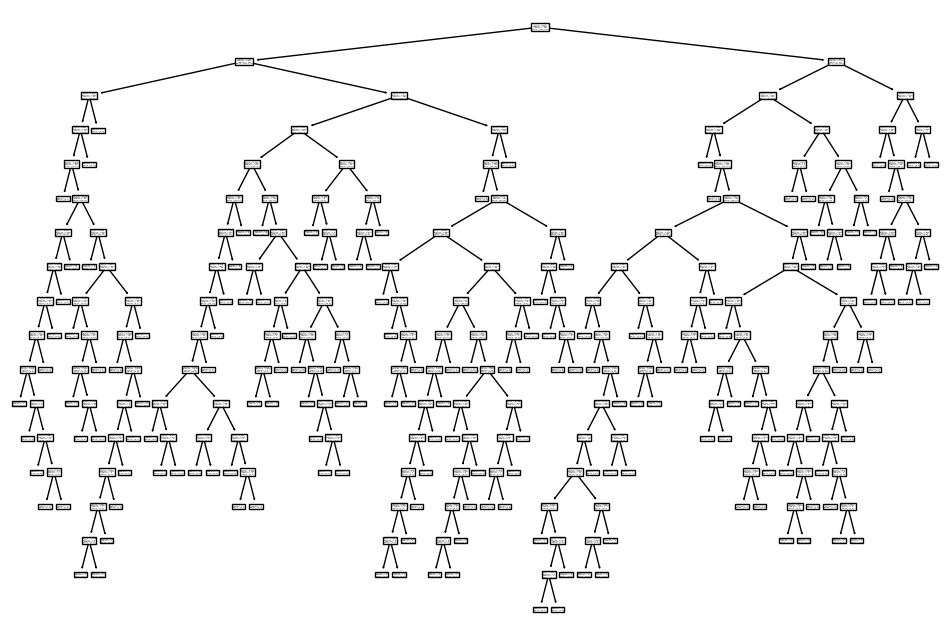

In [39]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(x_train, y_train))

## MODEL 4 -USING SVM

In [40]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5652173913043478


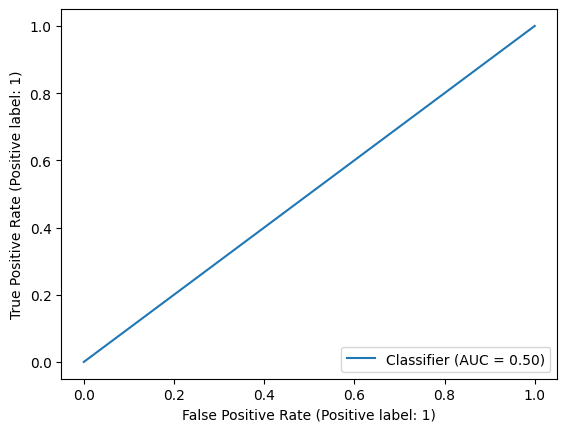

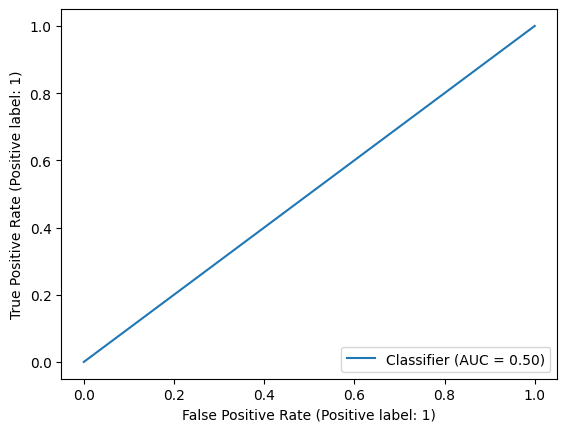

In [42]:
# Create a RocCurveDisplay object
roc_curve_display = RocCurveDisplay.from_predictions(y_test, y_pred)

# Plot the ROC curve
roc_curve_display.plot()